In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install keras==2.15.0

In [3]:
import keras
keras.__version__

'2.15.0'

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import os

In [5]:
print(os.listdir("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images"))

['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

In [6]:
values = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
values.sort()
values = values[1:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [7]:
print("Number of classes:",len(values))

Number of classes: 101


In [8]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [9]:
len(calories)

101

In [10]:
calories[0]

'Apple Pie: ~2.5 calories per gram'

In [11]:
print("First element:",values[0],"\nLast element:",values[-1])

First element: apple_pie 
Last element: waffles


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images',
                                               target_size=(224,224),
                                               batch_size= 64,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images',
                                               target_size=(224,224),
                                               batch_size= 64,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [13]:
print("Images Shape:",train_data.image_shape)

Images Shape: (224, 224, 3)


In [14]:
print('\nBatch Size:',100,
     "\nNunmber of Batches in training set:",len(train_data),
     "\nNunmber of Batches in testing set:",len(test_data),
     "\nNumber of Samples in training set:",train_data.samples,"Samples",
     "\nNumber of Samples in testing set:",test_data.samples,"Samples")


Batch Size: 100 
Nunmber of Batches in training set: 1421 
Nunmber of Batches in testing set: 158 
Number of Samples in training set: 90900 Samples 
Number of Samples in testing set: 10100 Samples


In [15]:
print("\nThe 101 Classes numbers:\n",np.unique(train_data.labels),"\n",
       "_"*30,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")


The 101 Classes numbers:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
______________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cake

In [16]:
train_data.image_shape

(224, 224, 3)

In [17]:
np.unique(train_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [18]:
np.unique(test_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [19]:
train_data.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [20]:
# Print class indices to verify
class_indices = train_data.class_indices
class_names = list(class_indices.keys())
print("Class names:", class_names)

Class names: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

In [21]:
# Initialize a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add Fully Connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
          

In [22]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,
    validation_data=train_data,
    validation_steps=train_data.samples // train_data.batch_size
)

Epoch 1/10
1420/1420 [==============================] - 2863s 2s/step - loss: 4.4784 - accuracy: 0.0307 - val_loss: 4.1948 - val_accuracy: 0.0773
Epoch 2/10
1420/1420 [==============================] - 2928s 2s/step - loss: 4.1194 - accuracy: 0.0769 - val_loss: 3.7729 - val_accuracy: 0.1393
Epoch 3/10
1420/1420 [==============================] - 2950s 2s/step - loss: 3.8514 - accuracy: 0.1165 - val_loss: 3.4129 - val_accuracy: 0.2018
Epoch 4/10
1420/1420 [==============================] - 2792s 2s/step - loss: 3.5849 - accuracy: 0.1539 - val_loss: 3.0610 - val_accuracy: 0.2884
Epoch 5/10
1420/1420 [==============================] - 3147s 2s/step - loss: 3.3031 - accuracy: 0.1980 - val_loss: 2.6877 - val_accuracy: 0.3784
Epoch 6/10
1420/1420 [==============================] - 3246s 2s/step - loss: 3.0148 - accuracy: 0.2484 - val_loss: 2.2678 - val_accuracy: 0.4927
Epoch 7/10
1420/1420 [==============================] - 3023s 2s/step - loss: 2.7218 - accuracy: 0.2992 - val_loss: 1.8244 -

In [23]:
def plot_training_history(history, filename='training_history.png'):
    plt.figure()
    plt.plot(history.history['accuracy'], c='blue', label='accuracy')
    plt.plot(history.history['loss'], c='red', label='loss')
    plt.title('Training Data')
    plt.legend(loc='upper right')
    plt.savefig(filename)
    plt.show()

In [24]:
def plot_confusion_matrix(y_true, y_pred, class_names, filename='confusion_matrix.png'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sn.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(filename)
    plt.show()

In [25]:
loss, acc = model.evaluate(test_data)

158/158 [==============================] - 79s 501ms/step - loss: 4.2037 - accuracy: 0.1607


In [26]:
print("Test Accuracy:",round(acc*100,2),"%","\nTest Loss:",round(loss,4))

Test Accuracy: 16.07 % 
Test Loss: 4.2037


In [27]:
results3 = {
    'accuracy': [0.6, 0.7, 0.8, 0.85,0.9924,0.9962,0.9970,0.9986,0.9995,0.9997,0.9997,0.9999,0.9999,1.0000,0.9999,1.0000,1.0000],
    'loss': [0.5, 0.4, 0.3, 0.25,4.3456,0.0816,0.0646,0.0562,0.0460,0.0379,0.0325,0.0284,0.0245,0.0216,0.0191,0.0173,0.0158,0.0145],
    'val_accuracy':[0.7065,0.7417,0.7487,0.7535,0.7697,0.7693,0.7716,0.7722,0.7721,0.7736,0.7749,0.7743,0.7733],
    'val_loss': [0.6, 0.5, 0.4, 0.3,1.6280,1.4801,1.4059,1.3613,1.2399,1.2145,1.1774,1.1357,1.1133,1.0886,1.0805,1.0645,1.0611]
}

In [28]:
model.save("model_food_1015.h5")

In [29]:
results3['val_accuracy']

[0.7065,
 0.7417,
 0.7487,
 0.7535,
 0.7697,
 0.7693,
 0.7716,
 0.7722,
 0.7721,
 0.7736,
 0.7749,
 0.7743,
 0.7733]

In [30]:
results3['val_loss']

[0.6,
 0.5,
 0.4,
 0.3,
 1.628,
 1.4801,
 1.4059,
 1.3613,
 1.2399,
 1.2145,
 1.1774,
 1.1357,
 1.1133,
 1.0886,
 1.0805,
 1.0645,
 1.0611]

In [31]:
loss = 0.3456
rounded_loss = round(loss, 4)
rounded_loss

0.3456

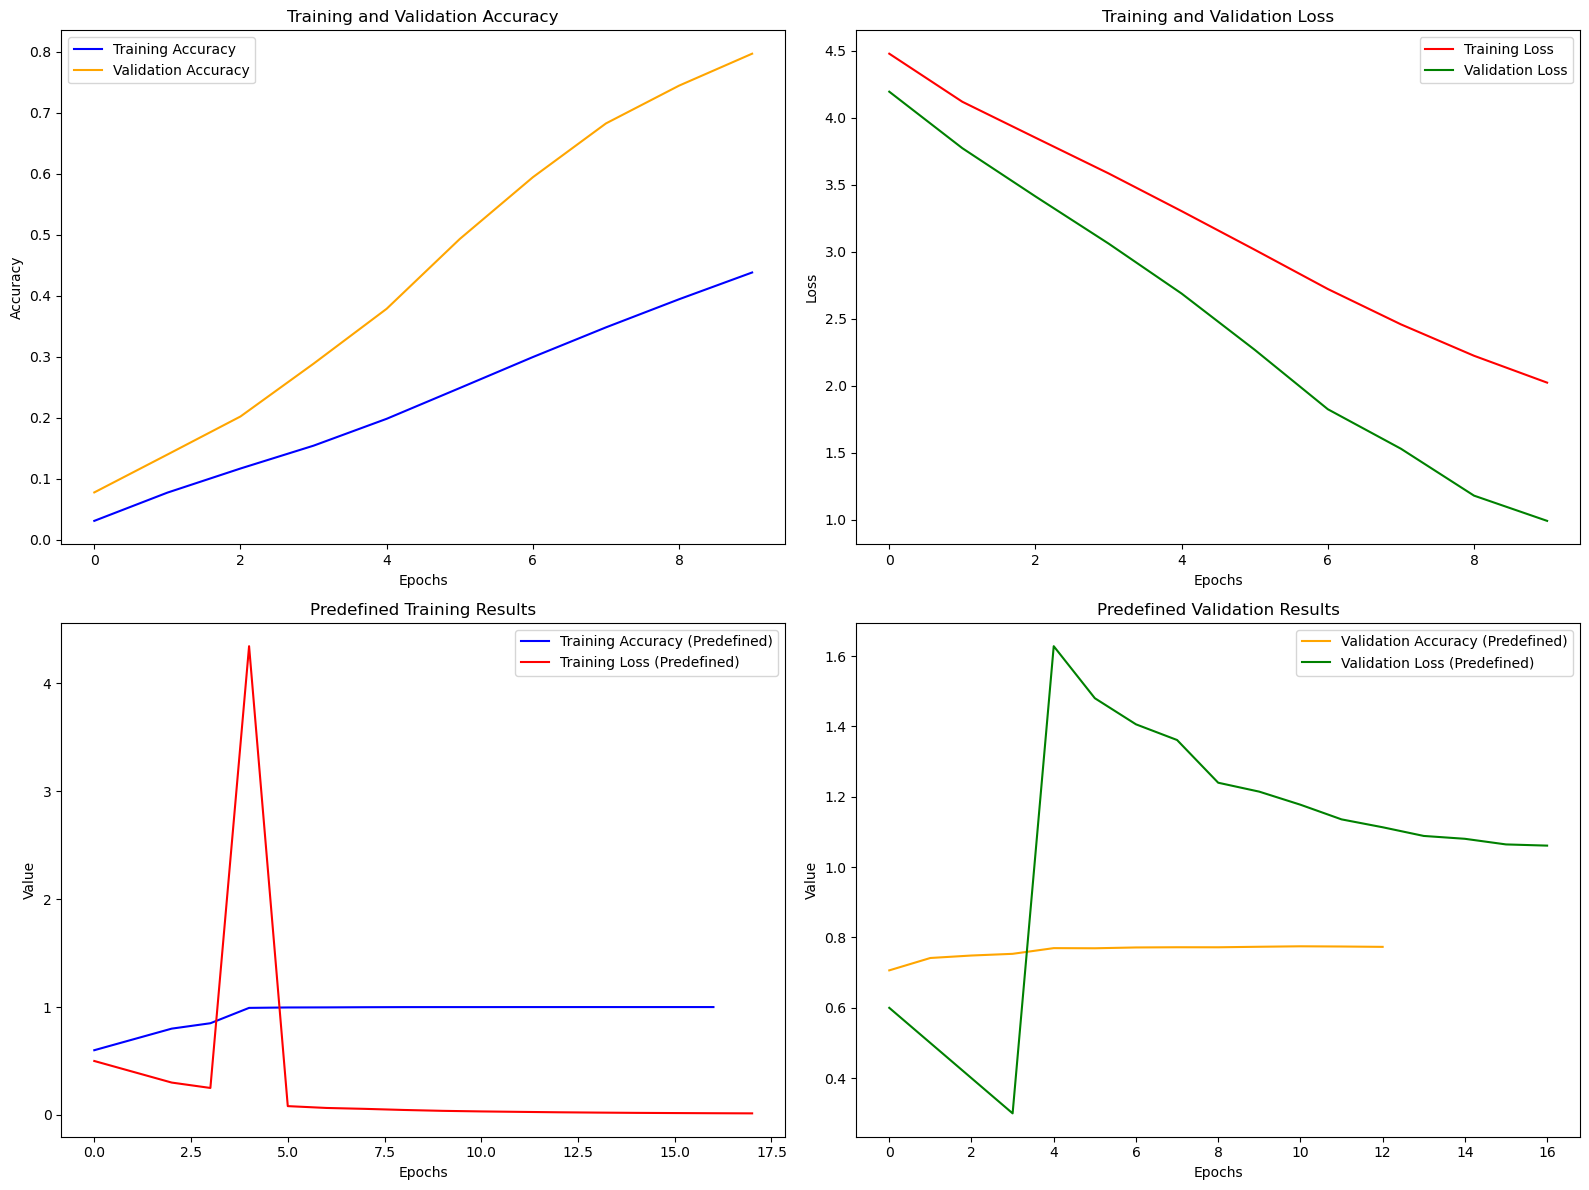

In [32]:
# Plot training results
def plot_results(history, results3):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Accuracy and Loss over epochs
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    axes[0, 0].set_title('Training and Validation Accuracy')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['loss'], label='Training Loss', color='red')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', color='green')
    axes[0, 1].set_title('Training and Validation Loss')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    # Results3 accuracy and loss
    axes[1, 0].plot(results3['accuracy'], label='Training Accuracy (Predefined)', color='blue')
    axes[1, 0].plot(results3['loss'], label='Training Loss (Predefined)', color='red')
    axes[1, 0].set_title('Predefined Training Results')
    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].legend()
    
    axes[1, 1].plot(results3['val_accuracy'], label='Validation Accuracy (Predefined)', color='orange')
    axes[1, 1].plot(results3['val_loss'], label='Validation Loss (Predefined)', color='green')
    axes[1, 1].set_title('Predefined Validation Results')
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Value')
    axes[1, 1].legend()
    plt.tight_layout()
    plt.show()

plot_results(history, results3)

In [33]:
yp = model.predict(test_data).argmax(axis=1).reshape(-1,)
yp.shape

158/158 [==============================] - 72s 456ms/step


(10100,)

In [34]:
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
m

Predicted,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Actual,,,,,,,,,,,,,,,,,,,,,
0,2,0,4,0,0,0,2,0,2,3,...,0,3,0,1,0,0,0,3,0,2
1,1,10,0,0,0,3,1,0,3,0,...,0,0,9,1,1,0,3,0,2,4
2,3,0,12,0,0,0,2,0,3,0,...,2,1,0,0,0,1,0,2,1,0
3,0,0,1,35,3,6,0,1,0,1,...,0,0,0,1,1,0,2,0,2,0
4,3,1,0,3,10,1,0,1,1,2,...,0,0,2,0,1,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,1,0,2,1,0,0,2,0,1,...,4,0,1,1,0,8,0,0,0,0
97,1,0,0,0,1,0,0,0,3,1,...,0,0,1,1,1,1,9,1,0,3
98,2,0,0,0,0,2,1,0,1,0,...,1,1,0,1,1,0,1,12,0,1


158/158 [==============================] - 72s 452ms/step


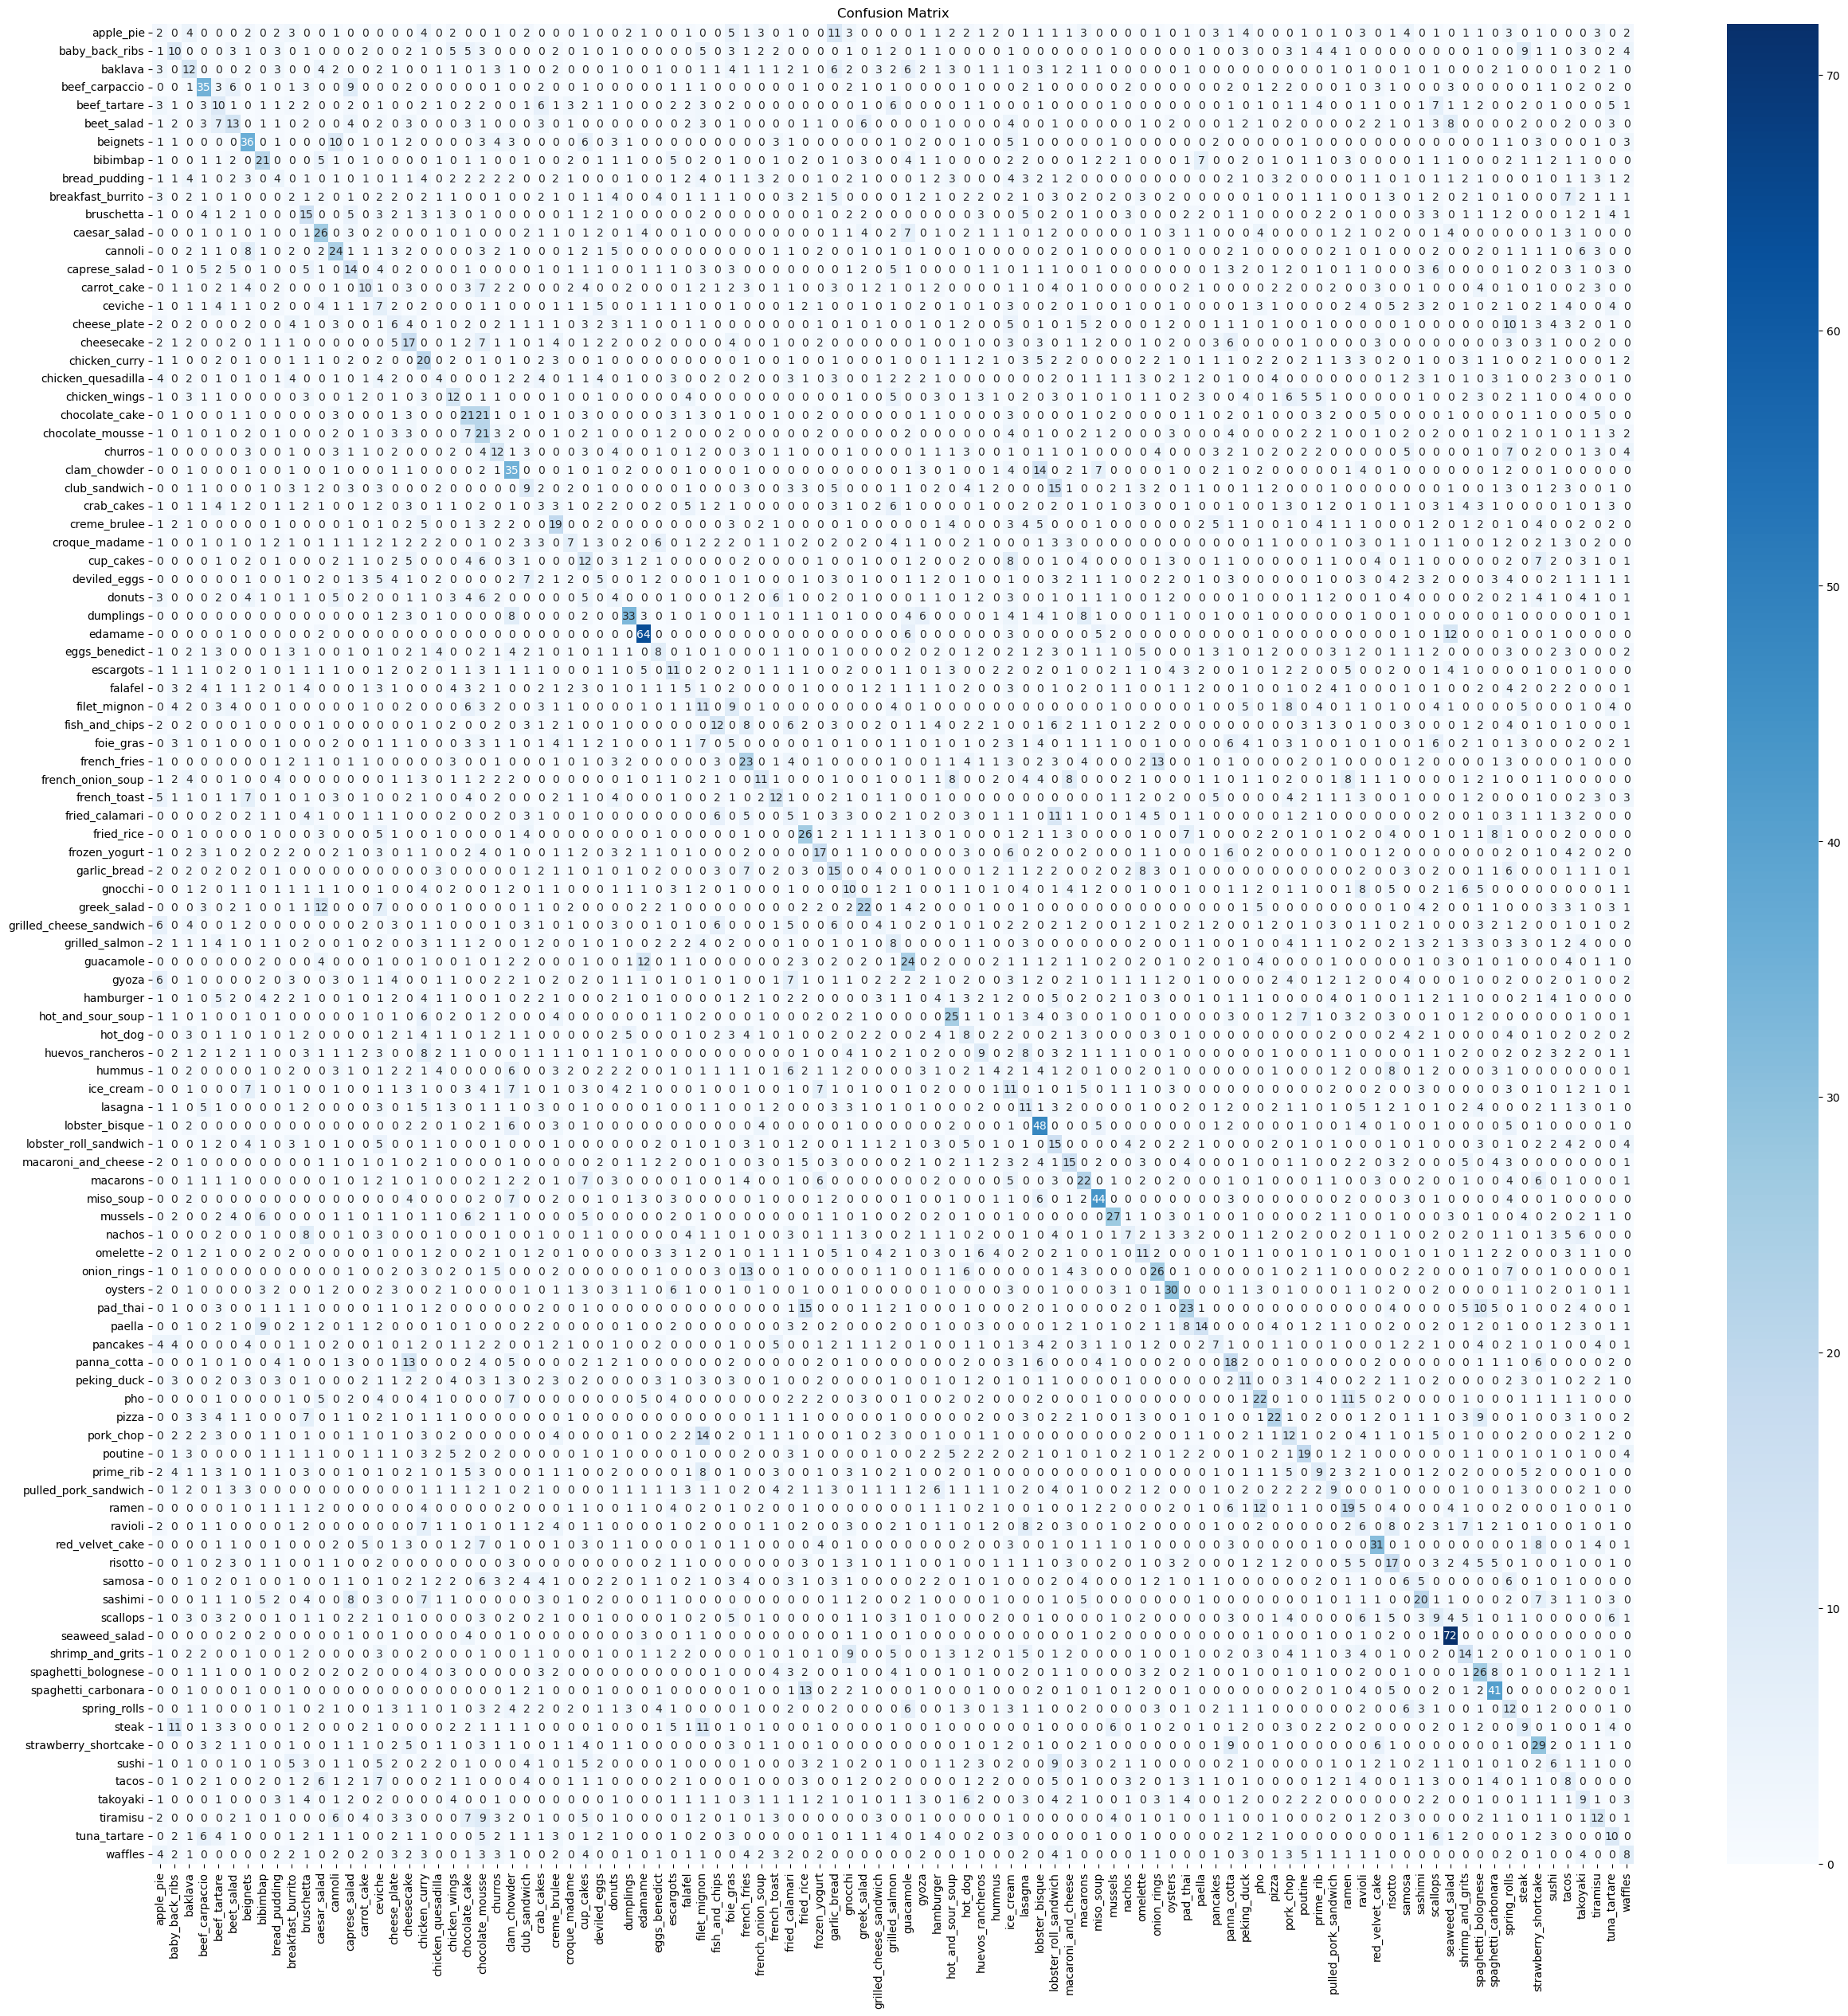

In [35]:
# Predict and plot confusion matrix
yp = model.predict(test_data).argmax(axis=1)
conf_matrix = confusion_matrix(test_data.classes, yp)

plt.figure(figsize=(30, 30))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(os.listdir("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images"))

['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

Macarons Sample


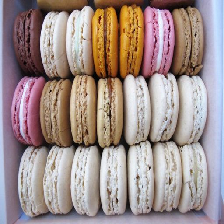

In [37]:
print("Macarons Sample")
macarons = load_img("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images\\macarons\\397950.jpg",target_size=(224,224))
macarons

Pizza Sample


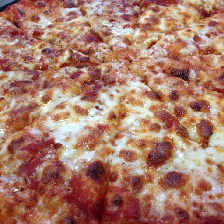

In [38]:
print("Pizza Sample")
pizza = load_img("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images\\pizza\\1870865.jpg",target_size=(224,224,3))
pizza

Donuts Sample


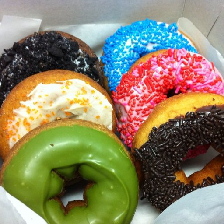

In [39]:
print("Donuts Sample")
donuts = load_img("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images\\donuts\\1065812.jpg",target_size=(224,224,3))
donuts

Frensh Toast Sample


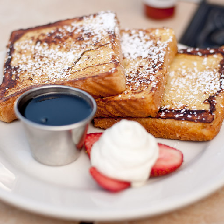

In [40]:
print("Frensh Toast Sample")
toast = load_img("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images\\french_toast\\359128.jpg",target_size=(224,224,3))
toast

French_fries Sample


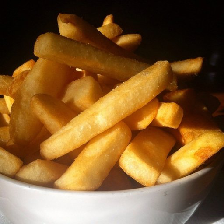

In [41]:
print("French_fries Sample")
fries = load_img("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images\\french_fries\\2246621.jpg",target_size=(224,224))
fries

Ice Cream Sample


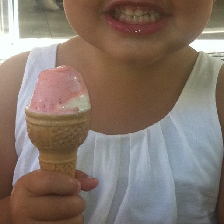

In [42]:
print("Ice Cream Sample")
ice = load_img("C:\\Users\\hoorm\\Desktop\\Codes\\Internship Prodigy\\PRODIGY_ML_05\\food-101\\food-101\\images\\ice_cream\\822123.jpg",target_size=(224,224))
ice

Text(0.5, 1.0, 'Donuts')

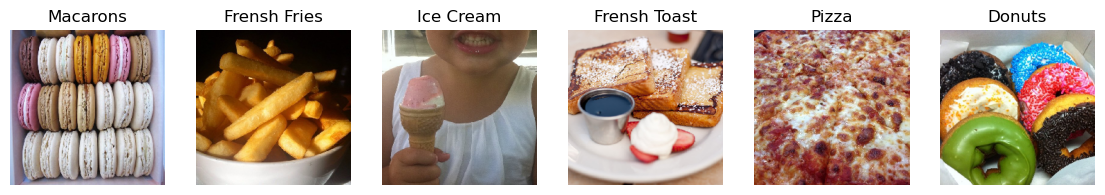

In [43]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(macarons)
plt.title("Macarons")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(fries)
plt.title("Frensh Fries")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(ice)
plt.title("Ice Cream")
# _____________________________________________
fig.add_subplot(1, 6, 4)
plt.axis('off')
plt.imshow(toast)
plt.title("Frensh Toast")
# _____________________________________________
fig.add_subplot(1, 6, 5)
plt.axis('off')
plt.imshow(pizza)
plt.title("Pizza")
# _____________________________________________
fig.add_subplot(1, 6, 6)
plt.axis('off')
plt.imshow(donuts)
plt.title("Donuts")

In [44]:
macarons = img_to_array(macarons)
fries = img_to_array(fries)
ice = img_to_array(ice)
pizza = img_to_array(pizza)
donuts = img_to_array(donuts)
toast = img_to_array(toast)
macarons = macarons/255
fries = fries/255
ice = ice/255
pizza = pizza/255
donuts = donuts/255
toast = toast/255
macarons = macarons.reshape(1,224,224,3)
fries = fries.reshape(1,224,224,3)
ice = ice.reshape(1,224,224,3)
pizza = pizza.reshape(1,224,224,3)
donuts = donuts.reshape(1,224,224,3)
toast = toast.reshape(1,224,224,3)

macarons.shape

(1, 224, 224, 3)

In [45]:
p1 = (model.predict(macarons)).argmax()

print("Class ",p1,": ",values[p1],sep='')
print(calories[p1],'\nNote:',s)

1/1 [==============================] - 0s 83ms/step
Class 63: macarons
Macarons: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [46]:
p2 = (model.predict(fries)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 [==============================] - 0s 29ms/step
Class 40: french_fries
French Fries: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [47]:
p3 = (model.predict(ice)).argmax()

print("Class ",p3,": ",values[p3],sep='')
print(calories[p3],'\nNote:',s)

1/1 [==============================] - 0s 29ms/step
Class 58: ice_cream
Ice Cream: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [48]:
p4 = (model.predict(pizza)).argmax()

print("Class ",p4,": ",values[p4],sep='')
print(calories[p4],'\nNote:',s)

1/1 [==============================] - 0s 28ms/step
Class 76: pizza
Pizza: ~2.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [49]:
p5 = (model.predict(donuts)).argmax()

print("Class ",p5,": ",values[p5],sep='')
print(calories[p5],'\nNote:',s)

1/1 [==============================] - 0s 26ms/step
Class 29: cup_cakes
Cupcakes: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [50]:
p6 = (model.predict(toast)).argmax()

print("Class ",p6,": ",values[p6],sep='')
print(calories[p6],'\nNote:',s)

1/1 [==============================] - 0s 29ms/step
Class 42: french_toast
French Toast: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.
